# Parcours d'un graphe 

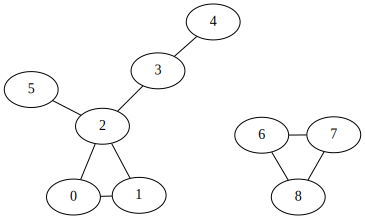

In [1]:
import include.helpers as h
G = h.exemple(h.Graphe)
h.afficher_graphe(G)

## Parcours en profondeur

In [2]:
def recursion_en_profondeur(G,v,marquage,d):
    marquage[v] = True
    print(" "*d,v,G.sommets_adjacents(v))
    for w in G.sommets_adjacents(v):
        if not marquage[w]:
            recursion_en_profondeur(G,w,marquage,d+1)
        else:
            print(" "*(d+1),w,"✓")
            
def parcours_en_profondeur(G,v):
    assert(v >= 0 and v < G.ordre())
    marquage = [False]*G.ordre()
    recursion_en_profondeur(G,v,marquage,0)

In [3]:
parcours_en_profondeur(G,0)

 0 [1, 2]
  1 [0, 2]
   0 ✓
   2 [0, 1, 3, 5]
    0 ✓
    1 ✓
    3 [2, 4]
     2 ✓
     4 [3]
      3 ✓
    5 [2]
     2 ✓
  2 ✓


In [4]:
parcours_en_profondeur(G,5)

 5 [2]
  2 [0, 1, 3, 5]
   0 [1, 2]
    1 [0, 2]
     0 ✓
     2 ✓
    2 ✓
   1 ✓
   3 [2, 4]
    2 ✓
    4 [3]
     3 ✓
   5 ✓


## Pré et post-ordre

In [5]:
def recursion_en_profondeur(G,v,pre,post,marquage):
    pre(v)
    marquage[v] = True
    for w in G.sommets_adjacents(v):
        if not marquage[w]:
            recursion_en_profondeur(G,w,pre,post,marquage)
    post(v)        
    
def parcours_en_profondeur(G,v,pre,post):
    assert(v >= 0 and v < G.ordre())
    marquage = [False]*G.ordre()
    recursion_en_profondeur(G,v,pre,post,marquage)

In [6]:
def nil(v): pass

parcours_en_profondeur(G,0,print,nil)

0
1
2
3
4
5


In [7]:
parcours_en_profondeur(G,0,nil,print)

4
3
5
2
1
0


## Parcours en largeur

In [41]:
from queue import Queue
from collections import deque

def parcours_en_largeur(G,v):
    marquage = [False]*G.ordre()
    Q = deque()
    Q.append(v); marquage[v] = True
    
    while len(Q):
        print(list(Q), end=" ")
        v = Q.popleft()
        print(list(Q), end=" ")
        print(v,G.sommets_adjacents(v))
        for w in G.sommets_adjacents(v):
            if not marquage[w]:
                Q.append(w); 
                marquage[w] = True
            else: 
                print(w,"✓")
        

In [42]:
parcours_en_largeur(G,0)

[0] [] 0 [1, 2]
[1, 2] [2] 1 [0, 2]
0 ✓
2 ✓
[2] [] 2 [0, 1, 3, 5]
0 ✓
1 ✓
[3, 5] [5] 3 [2, 4]
2 ✓
[5, 4] [4] 5 [2]
2 ✓
[4] [] 4 [3]
3 ✓


In [47]:
def parcours_en_largeur(G,v,action):
    marquage = [False]*G.ordre()
    Q = Queue()
    Q.put(v); marquage[v] = True
    
    while not Q.empty():
        v = Q.get()
        action(v)
        for w in G.sommets_adjacents(v):
            if not marquage[w]:
                Q.put(w); 
                marquage[w] = True

In [48]:
parcours_en_largeur(G,0,print)

0
1
2
3
5
4
